# Загрузка необходимых библиотек

In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix

# Загрузка данных

In [118]:
df_raw = pd.read_csv('winequalityN.csv')

In [ ]:
df_raw.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Изучение данных

Датафрейм содержит следующие колонки:

1 - fixed acidity (фиксированная кислотность)

2 - volatile acidity (летучая кислотность)

3 - citric acid (лимонная кислота)

4 - residual sugar (остаточный сахар)

5 - chlorides (хлориды)

6 - free sulfur dioxide (свободный диоксид серы)

7 - total sulfur dioxide (общий диоксид серы)

8 - density (плотность)

9 - pH (водородный показатель)

10 - sulphates (сульфаты)

11 - alcohol (алкоголь)

12 - quality (качество, от 0 до 10)

К категориальным данным относятся: type.

In [119]:
le = LabelEncoder()
df_type = df_raw.copy()
df_type.type = le.fit_transform(df_raw.type.values)
df_type

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_type.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>],
       [<Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>],
       [<Axes: title={'center': 'quality'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

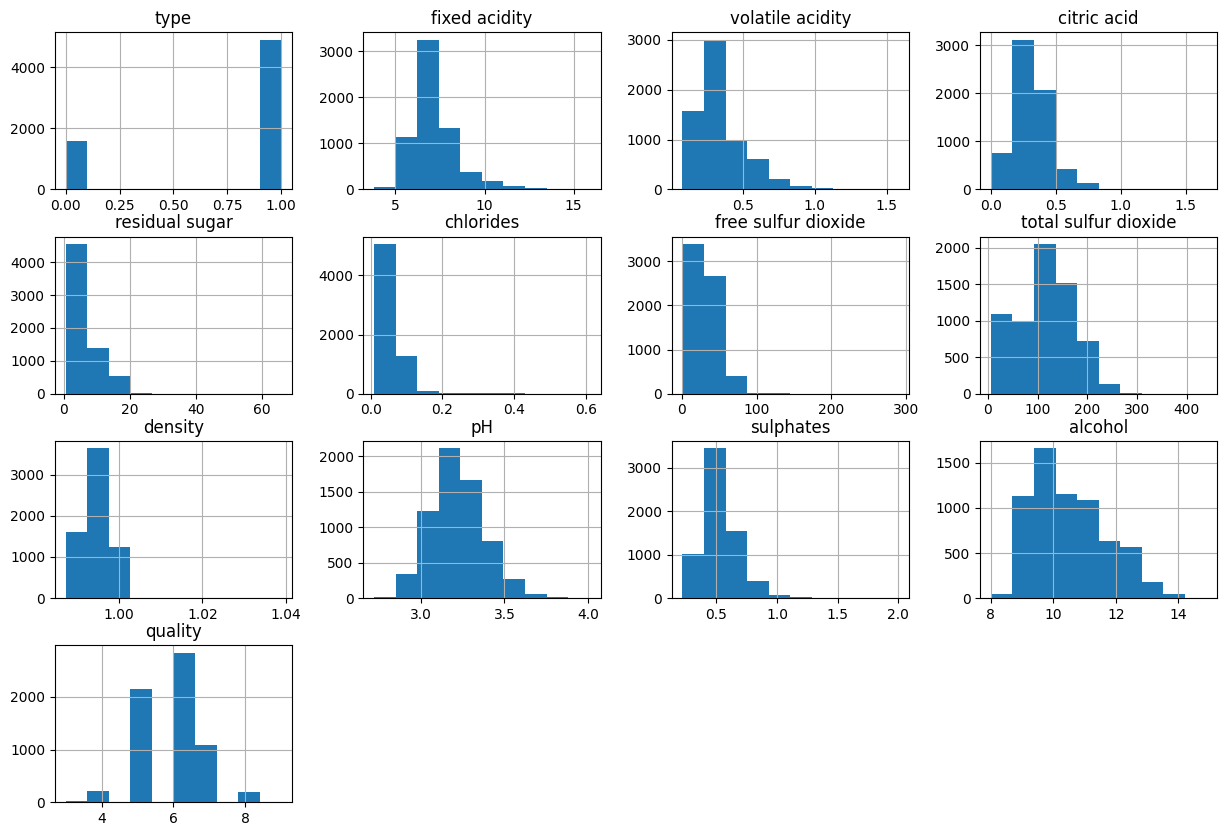

In [ ]:
df_type[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].hist(figsize=(15, 10), )

По гистограмме видим, что целевые классы не сбалансированы:

In [40]:
df_type['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Проверка на наличие пропусков

In [ ]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


Пропуски наблюдаются в признаках: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH, sulphates.

Редакция пропущенных значений: заполнение средним

In [42]:
df_mean = df_type.copy()
for col in df_raw.columns:
  if df_raw[col].isnull().sum() > 0:
    df_mean[col] = df_raw[col].fillna(df_raw[col].mean())
 
df_mean.info()
df_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


<Axes: title={'center': 'Гистограмма fixed acidity до и после заполнения отсутствующих значений'}, ylabel='Frequency'>

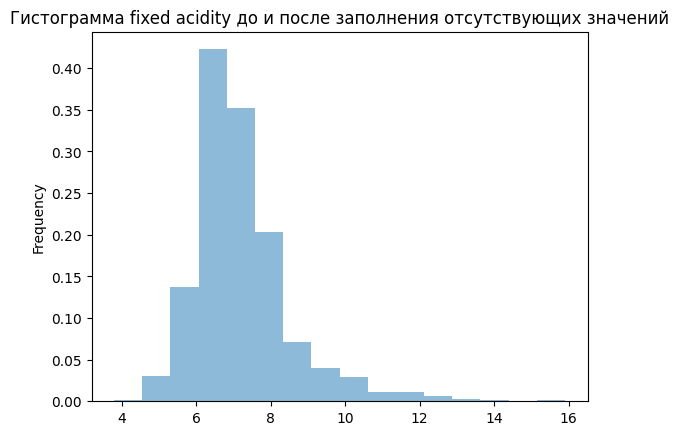

In [164]:
df_type['fixed acidity'].plot(kind='hist', alpha=0.5, bins=16, density = True, title = 'Гистограмма fixed acidity до и после заполнения отсутствующих значений')
#df_mean['fixed acidity'].plot(kind='hist', alpha=0.3, bins=16, density = True)


Заполнение отсутствующих значений не повлияло на распределения.

In [136]:
df_mean.to_csv('df_mean.csv', sep='\t', encoding='utf-8')

# Изучение признаков

Убедимся, что разные классы Quality характерезуются разными значениями признаков.

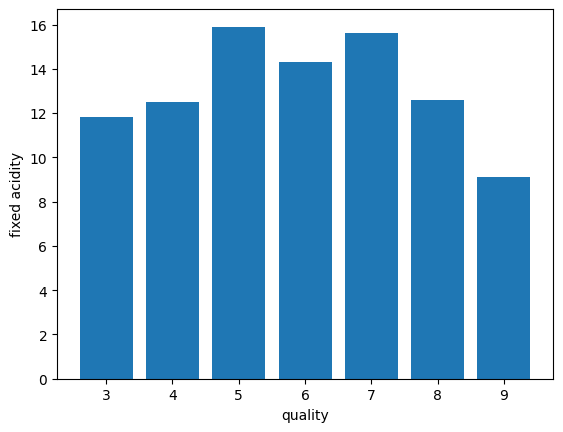

In [ ]:
plt.bar(df_mean['quality'], df_mean['fixed acidity'])
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

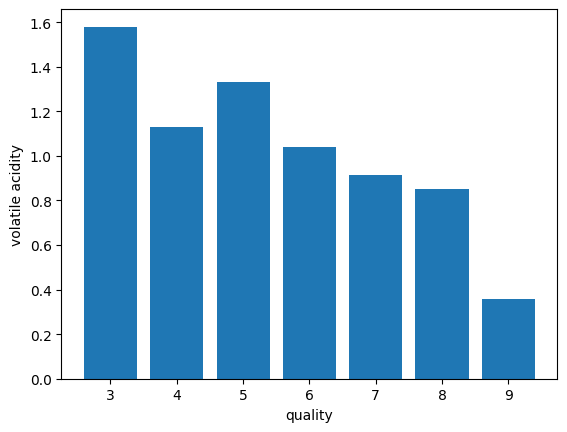

In [ ]:
plt.bar(df_mean['quality'], df_mean['volatile acidity'])
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

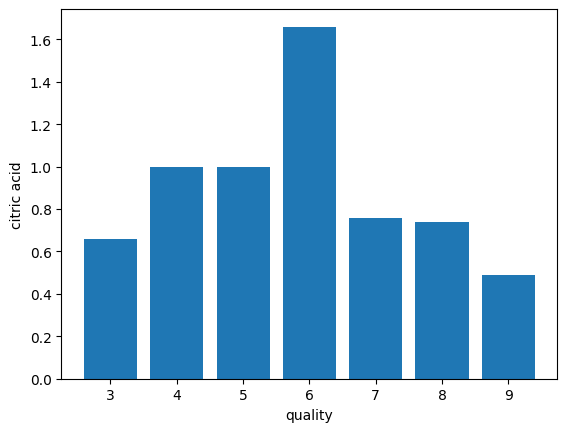

In [ ]:
plt.bar(df_mean['quality'], df_mean['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

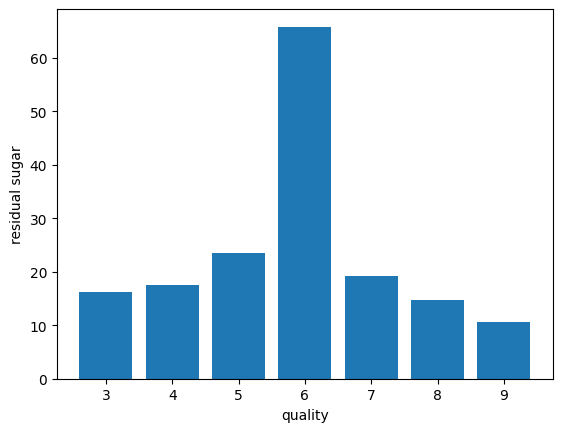

In [ ]:
plt.bar(df_mean['quality'], df_mean['residual sugar'])
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

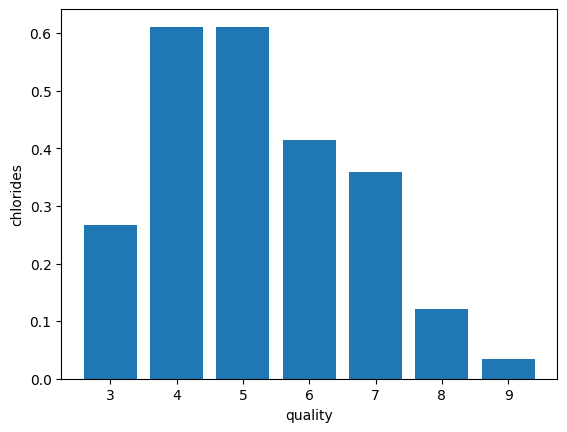

In [ ]:
plt.bar(df_mean['quality'], df_mean['chlorides'])
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

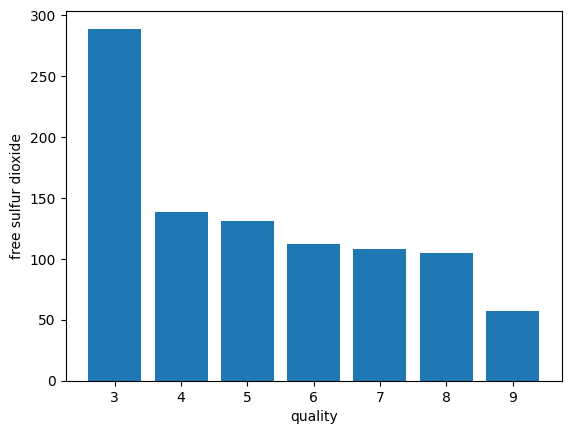

In [ ]:
plt.bar(df_mean['quality'], df_mean['free sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()

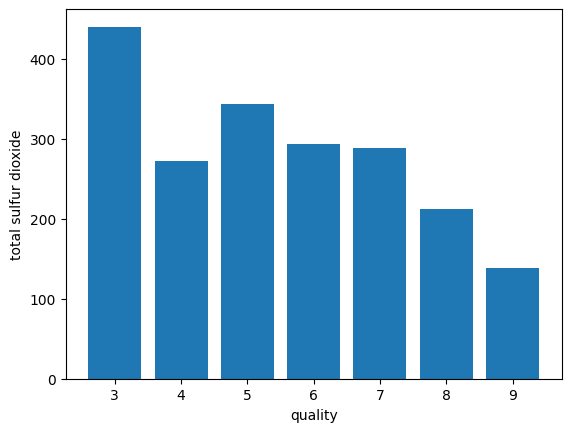

In [ ]:
plt.bar(df_mean['quality'], df_mean['total sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

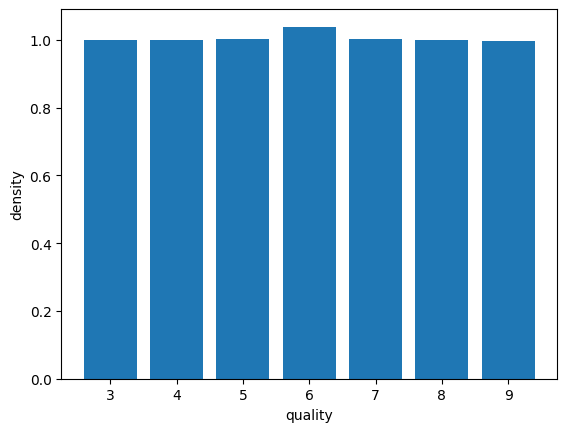

In [ ]:
plt.bar(df_mean['quality'], df_mean['density'])
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

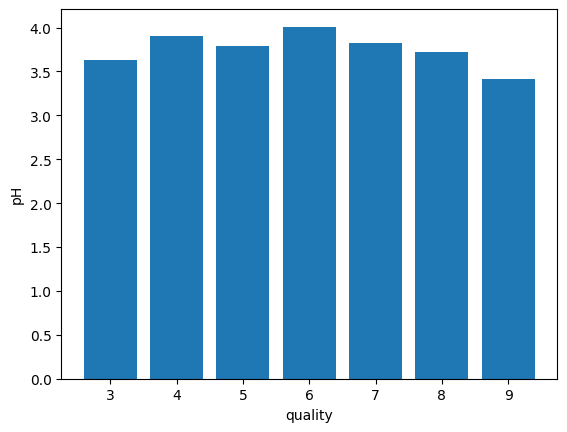

In [ ]:
plt.bar(df_mean['quality'], df_mean['pH'])
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

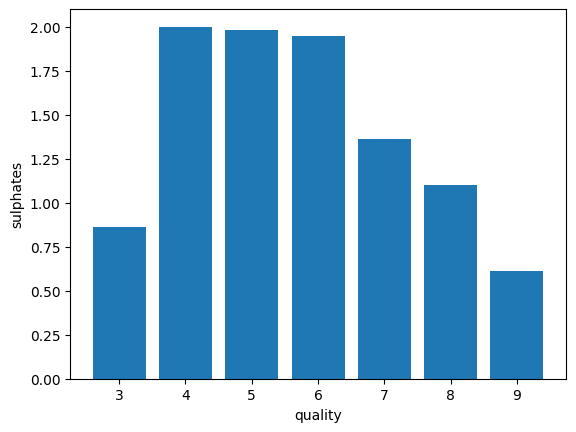

In [ ]:
plt.bar(df_mean['quality'], df_mean['sulphates'])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

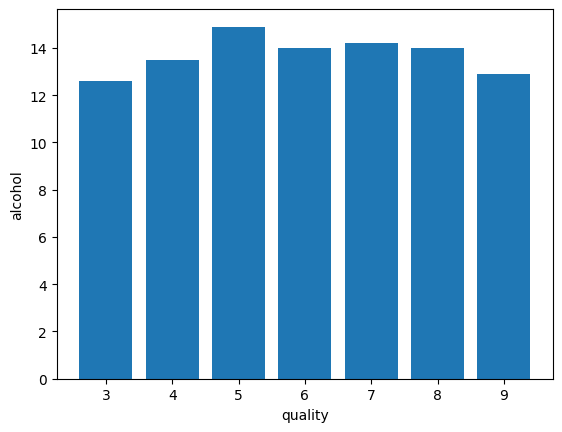

In [ ]:
plt.bar(df_mean['quality'], df_mean['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

Как видим из гистограмм: признак  density не дифференцируется по классам quality, слабо дифференцируются pH и alcohol.

<Axes: >

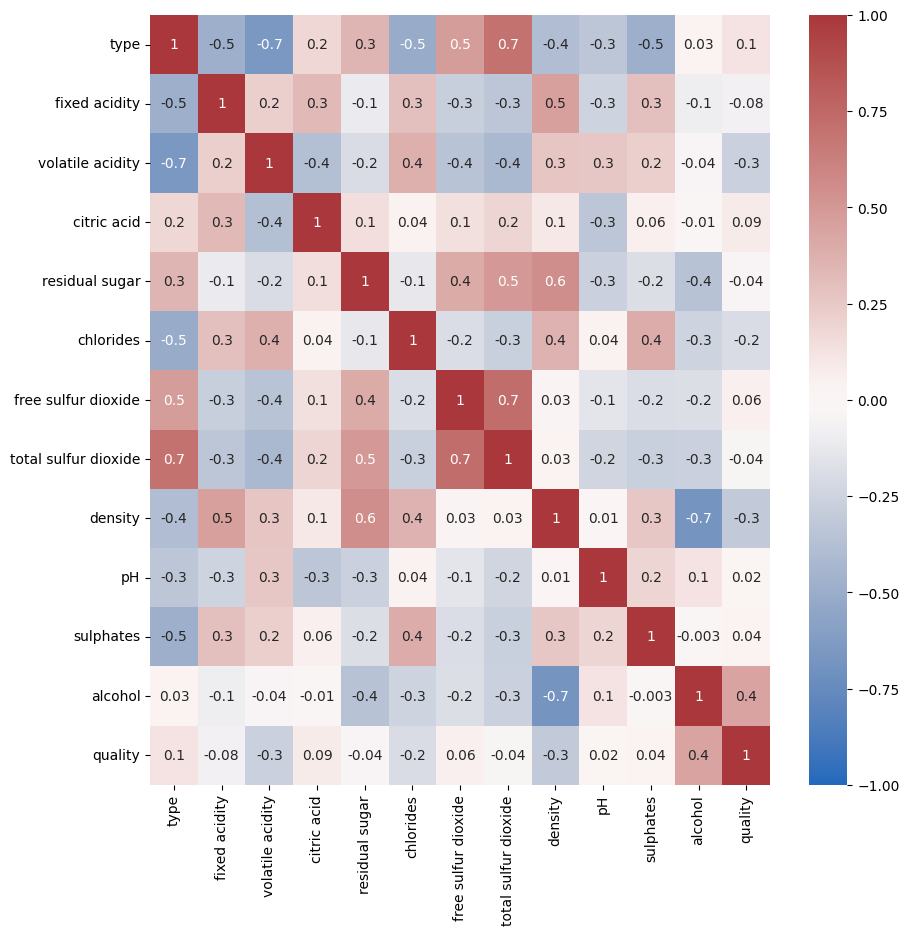

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_mean.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, cmap= 'vlag')


Удалим признаки, которые плохо дифференцируются по выделенным классам.

In [143]:
df_m_del = df_mean.copy()
df_m_del.drop(['density'], axis = 1, inplace = True)
display(df_m_del.head())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6


In [146]:
df_m_del.to_csv('df_m_del.csv', sep='\t', encoding='utf-8')

# Разделение выборки

In [120]:
X_mean = df_mean.drop(['quality'], axis=1)
Y_mean = df_mean['quality'] 

In [140]:
X_del = df_m_del.drop(['quality'], axis=1)
Y_del = df_m_del['quality'] 

Балансировка классов

In [147]:
sm = SMOTE(k_neighbors=2, random_state=99)

X_sm, y_sm = sm.fit_resample(X_mean, Y_mean)

In [148]:
y_sm.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

In [160]:
X_sm.to_csv('X_sm.csv', sep='\t', encoding='utf-8')
y_sm.to_csv('y_sm.csv', sep='\t', encoding='utf-8')

In [124]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_mean, Y_mean, test_size=0.2, random_state=99)

In [144]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_del, Y_del, test_size=0.2, random_state=99)

In [150]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=99)

In [151]:
X_train_sm

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
15268,1,5.527086,0.445049,0.161961,2.107476,0.027346,29.000000,129.850487,0.989842,3.386262,0.760282,13.213108
13205,0,8.972178,0.377566,0.409652,2.393044,0.101435,6.000000,10.000000,0.996016,3.136260,0.583478,11.875655
3260,1,7.400000,0.190000,0.310000,14.500000,0.045000,39.000000,193.000000,0.998600,3.100000,0.500000,9.200000
9793,1,6.077096,0.323544,0.280726,2.003112,0.049239,37.979255,114.000000,0.992558,3.262187,0.468332,10.002074
14994,1,6.800000,0.278854,0.371742,2.011932,0.047353,34.353219,104.293561,0.990389,3.182983,0.479403,12.517424
...,...,...,...,...,...,...,...,...,...,...,...,...
19841,1,6.906746,0.359724,0.340337,4.219624,0.018052,56.911078,119.015331,0.989822,3.279755,0.360307,12.692948
1768,1,6.600000,0.370000,0.070000,1.400000,0.048000,58.000000,144.000000,0.992200,3.170000,0.380000,10.000000
9929,0,6.886018,0.670504,0.006600,1.644003,0.066580,4.000000,8.000000,0.994673,3.336600,0.361199,10.113982
3240,1,6.400000,0.160000,0.420000,1.000000,0.036000,29.000000,113.000000,0.990800,3.180000,0.520000,11.000000


In [152]:
X_train_sm.shape, X_test_sm.shape

((15881, 12), (3971, 12))

In [154]:
norm = MinMaxScaler()

X_train_sm_n = norm.fit_transform(X_train_sm)
X_test_sm_n = norm.transform(X_test_sm)

In [ ]:
X_train_sm_n

# Обучение модели.

In [129]:
models = []
models.append(("Logistic Regression", LogisticRegression(max_iter=80000)))
models.append(('Support Vector Classification', SVC(kernel='rbf')))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

Обучение моделей на датафрейме с пропущенными значениями, заполненными средним.

In [130]:
random_state=99
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=random_state)
    cv_results = cross_val_score(model, X_train_r, y_train_r, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.538201 (0.020290)
Support Vector Classification: 0.433915 (0.019554)
Random Forest: 0.671548 (0.015786)
Decision Tree: 0.588406 (0.024312)


Обучение моделей на данных без признака density.

In [145]:
random_state=99
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=random_state)
    cv_results = cross_val_score(model, X_train_d, y_train_d, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.487017 (0.018030)
Support Vector Classification: 0.433339 (0.021755)
Random Forest: 0.651533 (0.017166)
Decision Tree: 0.567055 (0.019659)


In [156]:
random_state=99
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=random_state)
    cv_results = cross_val_score(model, X_train_sm_n, y_train_sm, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.488005 (0.012395)
Support Vector Classification: 0.602733 (0.009945)
Random Forest: 0.890057 (0.006757)
Decision Tree: 0.817391 (0.009156)
